xrk4(T) is [-0.9585871830343914, 0.8414704778002743, 0.4794255152508447, 0.09983341663852982, 0.04997916927041819, 0.009999833334166581]
xverlet(T) is [-0.6842799186706543, 0.8925317615571862, 0.5228995160040915, 0.10978012866568497, 0.05497250402160689, 0.010999780001287004]


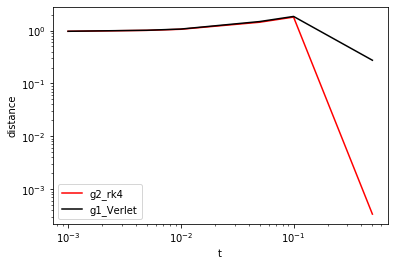

In [37]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

#I have Garcia's rk4 module in the same working directory

from rk4 import rk4						#this imports rk4 
										
								
										
def deriv(X,t,param):
	return np.array([X[1],-X[0]])  # this is dX/dt = deriv(X,t)
											#note that this funny form is chosen to match Garcia's rk4 function
							
										
'''
def euler(X,t,tau,derivs,params):		#this defines the euler update.  Pretty easy to code, but remember it's innacurate
	return X+tau*deriv(X,t,params)		#the function definition matches rk4

'''





distance=0.
velocity=1.0
t=0.0
T=5.0
#g=9.81
#L=1.0
#these are the parameters for our system

dt_array=[.5,.1,.05,.01,.005,.001] #time steps list
dt=0.5
niter=T/dt
#these are the parameters for our integrator


X=np.array([0.0,1.0],dtype=float)  #where we will store the data at each timestep for  rk4
#sampleTimes=np.asarray(range(int(niter)+1))*dt
rk4Result=np.asarray([distance])		#where we will store the data for plotting

verletResult=np.asarray([distance])

y=np.ones(len(dt_array))*np.sin(5) #y is sin(T) for calcualtion of g1 and g2
#print(y)
rk4Result_finalT=[] #initializing list to store distance at T=5 for each time step
verletResult_finalT=[] #initializing list to store distance at T=5 for each time step



#loop to calcualte distances for the time range and storing the distance at final time T=5 in list rk4Result_finalT  for a particular time step in dt_array
for i in dt_array: 
    
    X[0]=distance
    X[1]=velocity
    t=0
    dt=i
    for titer in range(int(niter)):
        
        X=rk4(X,t,dt,deriv,[])
        rk4Result=np.append(rk4Result,[X[0]])  #store the value of distance we saw
        t=t+dt
    
    #print(rk4Result)
    #print(rk4Result[-1])
    rk4Result_finalT.append(rk4Result[-1])

print('xrk4(T) is '+ str(rk4Result_finalT))
	
	
	
#loop to calcualte distances for the time range and storing the distance at  final time T=5 in list verletResult_finalT for a particular time step in dt_array
for i in dt_array:
    dt=i
    t=0
    X[1]=distance  												#initial value of the distance
    X[0]=distance+velocity*dt+dt*dt*(-distance)/2					#next value of the distance (startup)
    np.append(verletResult,[X[0]])
    for titer in range(int(niter)):
        xcurr=X[0]									#current value of x
        X[0]=2*X[0]-X[1]+dt*dt*(-(xcurr))		#update the value of the current x
        X[1]=xcurr									#update the value of the old x
        verletResult=np.append(verletResult,[X[0]])  			#store the value of distance we saw
        t=t+dt
    #print(verletResult)
    #print(verletResult[-1])
    verletResult_finalT.append(verletResult[-1])
print('xverlet(T) is '+ str(verletResult_finalT))

g2=abs(y-rk4Result_finalT) #calcualting g2 as asked
g1=abs(y-verletResult_finalT) #calcualting g1 as asked
fig,(a1)=plt.subplots(1)


a1.plot(dt_array,g2,color='r',label='g2_rk4')
a1.plot(dt_array,g1,color='k',label='g1_Verlet')

ax1=a1.axes

a1.legend(loc='lower left')
a1.set_xlabel('t')
a1.set_ylabel('distance')
a1.set_xscale('log')
a1.set_yscale('log')

plt.savefig('Pb2b.png')
plt.show()	